In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
df = pd.read_json('../../data/cryptopunk_txn_history-2021-10-07.jsonl', lines=True)
print("DF Shape:", df.shape)
print("Column Names:", df.columns)
print("Unique Transaction Types:", df.txn_type.unique())
df

DF Shape: (167492, 12)
Column Names: Index(['txn_type', 'from', 'to', 'date', 'timestamp', 'source', 'eth',
       'punk_id', 'from_wallet_address', 'to_wallet_address', 'type',
       'accessories'],
      dtype='object')
Unique Transaction Types: ['Bid Withdrawn' 'Bid' 'Sold' 'Offered' 'Transfer' 'Claimed'
 'Offer Withdrawn' '(Wrap)' '(Unwrap)']


,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
...,...,...,...,...,...,...,...,...,...,...,...,...
167487,Bid,0xa0a59c,,2017-07-03,2017-07-03,larvalabs,0.25,9999,None,None,[Female],"[Mohawk, Nerd Glasses]"
167488,Bid,0x717403,,2017-06-26,2017-06-26,larvalabs,0.20,9999,None,None,[Female],"[Mohawk, Nerd Glasses]"
167489,Bid,ddaavvee,,2017-06-23,2017-06-23,larvalabs,0.20,9999,None,None,[Female],"[Mohawk, Nerd Glasses]"
167490,Bid,0x5b098b,,2017-06-23,2017-06-23,larvalabs,0.15,9999,None,None,[Female],"[Mohawk, Nerd Glasses]"


In [3]:
df["accessory_count"] = df["accessories"].str.len()
# Get unique punk ids
df_claimed = df[df.txn_type == 'Claimed']
df_claimed.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count
40,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3
103,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,1,None,None,[Male],"[Smile, Mohawk]",2
133,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,2,None,None,[Female],[Wild Hair],1
150,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,3,None,None,[Male],"[Wild Hair, Nerd Glasses, Pipe]",3
162,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,4,None,None,[Male],"[Big Shades, Wild Hair, Earring, Goat]",4


In [4]:
#df_sold = df[(df.txn_type == 'Sold') | (df.txn_type == 'Claimed')]
df_sold = df[(df.txn_type == 'Sold')]
df_sold.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count
22,Sold,0xf5099e,0xe08c32,2018-11-30,2018-11-30,larvalabs,25.00,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3
30,Sold,0x00d7c9,0xa0a59c,2017-07-07,2017-07-07,larvalabs,1.60,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3
37,Sold,0xc352b5,0x00d7c9,2017-06-23,2017-06-23,larvalabs,0.98,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3
52,Sold,EliteCat…,0xcf6165,2020-11-30,2020-11-30,larvalabs,60.00,1,None,None,[Male],"[Smile, Mohawk]",2
78,Sold,0xf5099e,GoWest23,2019-04-06,2019-04-06,larvalabs,31.00,1,None,None,[Male],"[Smile, Mohawk]",2


In [5]:
# Find the mean sale price for a cryptopunk per ID
mean_sale = df_sold.groupby('punk_id')[["eth"]].mean().reset_index()
mean_sale = mean_sale.rename(columns={"eth": "mean_eth"})
mean_sale.mean_eth = mean_sale.mean_eth.fillna(0)
mean_sale

,punk_id,mean_eth
0,0,9.193333
1,1,30.473333
2,14,1.750000
3,33,0.510000
4,53,57.330000
...,...,...
6388,9982,142.000000
6389,9989,0.300000
6390,9990,12.255000
6391,9997,79.495000


In [6]:
# merge dataframes on punk_id
with_avg_sale = pd.merge(df_sold, mean_sale, on="punk_id")
df_punk_claimed = pd.merge(df_claimed, mean_sale, on="punk_id")

with_avg_sale.head()
df_punk_claimed.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count,mean_eth
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3,9.193333
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,1,None,None,[Male],"[Smile, Mohawk]",2,30.473333
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,14,None,None,[Female],"[Pipe, Pilot Helmet, Hot Lipstick]",3,1.750000
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,33,None,None,[Male],[Peak Spike],1,0.510000
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,53,None,None,[Female],"[Big Shades, Straight Hair]",2,57.330000


In [7]:
# Conceptualize the "accessories" column as a 2D array
# Reducing its dimensions from 2 to 1 would allow us to apply value_counts
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

# Keep one unique punk_id column so that we can accurately count total accessories
unique_punk_id = df.drop_duplicates(subset=['punk_id'])

type_counts = to_1D(unique_punk_id["accessories"])
acc_type_counts = pd.DataFrame({'index':type_counts.index, 'accessory_type':type_counts.values})

print("Total Number of Accessories (shoud match above):", acc_type_counts.shape[0])
acc_type_counts.head()

Total Number of Accessories (shoud match above): 27539


,index,accessory_type
0,0,Green Eye Shadow
1,1,Earring
2,2,Blonde Bob
3,3,Smile
4,4,Mohawk


In [8]:
def under_100(row):
    val = 0
    if row < 100:
        val = 1
    return val

# Create dataframe that has accessory type and the count for all NFTs
acc_counts = pd.DataFrame(to_1D(unique_punk_id["accessories"]).value_counts()).reset_index()
acc_counts = acc_counts.rename(columns={0:'acc_count', 'index':'accessory_type'})
acc_counts = acc_counts.sort_values(by=['acc_count'], ascending=True)
acc_counts['percent_count'] = round(100 * (acc_counts['acc_count'] / acc_counts['acc_count'].sum()), 4)
print(acc_counts)

     accessory_type  acc_count  percent_count
86           Beanie         44         0.1598
85           Choker         48         0.1743
84     Pilot Helmet         54         0.1961
83            Tiara         55         0.1997
82      Orange Side         68         0.2469
..              ...        ...            ...
4              Mole        644         2.3385
3   Purple Lipstick        655         2.3784
2      Hot Lipstick        696         2.5273
1         Cigarette        961         3.4896
0           Earring       2459         8.9292

[87 rows x 3 columns]


In [9]:
acc_counts

,accessory_type,acc_count,percent_count
86,Beanie,44,0.1598
85,Choker,48,0.1743
84,Pilot Helmet,54,0.1961
83,Tiara,55,0.1997
82,Orange Side,68,0.2469
...,...,...,...
4,Mole,644,2.3385
3,Purple Lipstick,655,2.3784
2,Hot Lipstick,696,2.5273
1,Cigarette,961,3.4896


In [10]:
acc_counts_dict = dict(zip(acc_counts.accessory_type, acc_counts.acc_count))
acc_pct_dict = dict(zip(acc_counts.accessory_type, acc_counts.percent_count))

print(acc_counts_dict)
print(acc_pct_dict)

{'Beanie': 44, 'Choker': 48, 'Pilot Helmet': 54, 'Tiara': 55, 'Orange Side': 68, 'Buck Teeth': 78, 'Welding Goggles': 86, 'Pigtails': 94, 'Pink With Hat': 95, 'Top Hat': 115, 'Spots': 124, 'Rosy Cheeks': 128, 'Blonde Short': 129, 'Wild White Hair': 136, 'Cowboy Hat': 142, 'Wild Blonde': 144, 'Straight Hair Blonde': 144, 'Big Beard': 146, 'Blonde Bob': 147, 'Red Mohawk': 147, 'Vampire Hair': 147, 'Half Shaved': 147, 'Clown Hair Green': 148, 'Straight Hair Dark': 148, 'Straight Hair': 151, 'Silver Chain': 156, 'Dark Hair': 157, 'Purple Hair': 165, 'Gold Chain': 169, 'Medical Mask': 175, 'Tassle Hat': 178, 'Fedora': 186, 'Police Cap': 203, 'Clown Nose': 212, 'Smile': 238, 'Cap Forward': 254, 'Hoodie': 259, 'Front Beard Dark': 260, 'Frown': 261, 'Purple Eye Shadow': 262, 'Handlebars': 263, 'Blue Eye Shadow': 266, 'Green Eye Shadow': 271, 'Vape': 272, 'Front Beard': 273, 'Chinstrap': 282, '3D Glasses': 286, 'Luxurious Beard': 286, 'Mustache': 288, 'Normal Beard Black': 289, 'Normal Beard': 

In [119]:
digits = list(range(0,10000))
digits_str = []
for digit in digits:
    digits_str.append(str(digit))

final_digits = []
for digit in digits_str:
    if len(digit) == 1:
        digit = '000' + digit
    elif len(digit) == 2:
        digit = '00' + digit
    elif len(digit) == 3:
        digit = '0' + digit
    
    final_digits.append(digit)
        
base = 'https://www.larvalabs.com/public/images/cryptopunks/punk'

urls = []
for digit in final_digits:
    url = base + digit + '.png'
    urls.append(url)
urls

['https://www.larvalabs.com/public/images/cryptopunks/punk0000.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0001.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0002.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0003.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0004.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0005.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0006.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0007.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0008.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0009.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0010.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0011.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0012.png',
 'https://www.larvalabs.com/public/images/cryptopunks/punk0013.png',
 'https://www.larvalabs.com/public

In [120]:
urls_df = pd.DataFrame(zip(digits, urls))
urls_df = urls_df.rename(columns={0: "punk_id", 1:"url"})
urls_df

,punk_id,url
0,0,https://www.larvalabs.com/public/images/crypto...
1,1,https://www.larvalabs.com/public/images/crypto...
2,2,https://www.larvalabs.com/public/images/crypto...
3,3,https://www.larvalabs.com/public/images/crypto...
4,4,https://www.larvalabs.com/public/images/crypto...
...,...,...
9995,9995,https://www.larvalabs.com/public/images/crypto...
9996,9996,https://www.larvalabs.com/public/images/crypto...
9997,9997,https://www.larvalabs.com/public/images/crypto...
9998,9998,https://www.larvalabs.com/public/images/crypto...


In [11]:
def create_count_list(row):
    value_list = []
    for acc in row:
        value_list.append(acc_counts_dict[acc])
    
    return value_list

def create_count(row):
    if row != '':
        value = acc_counts_dict[row]
    else:
        value = None
        
    return value

def create_pct_list(row):
    value_list = []
    for acc in row:
        value_list.append(acc_pct_dict[acc])
    
    return value_list

def remove_list(row):
    value = row[0]
    return value

def remove_list_acc(row):
    value = ','.join(row)
    return value

In [12]:
mean_sale

,punk_id,mean_eth
0,0,9.193333
1,1,30.473333
2,14,1.750000
3,33,0.510000
4,53,57.330000
...,...,...
6388,9982,142.000000
6389,9989,0.300000
6390,9990,12.255000
6391,9997,79.495000


In [121]:
df["accessory_count"] = df["accessories"].str.len()
# Get unique punk ids
df_claimed = df[df.txn_type == 'Claimed']
df_claimed.head()

#df_sold = df[(df.txn_type == 'Sold') | (df.txn_type == 'Claimed')] # uncomment this to include punks that were not sold
df_sold = df[(df.txn_type == 'Sold')]
df_sold.head()

# Find the mean sale price for a cryptopunk per ID
mean_sale = df_sold.groupby('punk_id')[["eth"]].mean().reset_index()
mean_sale = mean_sale.rename(columns={"eth": "mean_eth"})
mean_sale.mean_eth = mean_sale.mean_eth.fillna(0)
mean_sale

# merge dataframe to add in average sale price, on punk_id
with_avg_sale = pd.merge(df_sold, mean_sale, on="punk_id")
df_counts = df_claimed.copy()
df_punk_claimed = pd.merge(df_claimed, mean_sale, on="punk_id")

# Format the type and accessory columns (remove the brackets)
#with_avg_sale['accessories_percents'] = with_avg_sale.accessories.apply(create_pct_list)
with_avg_sale['type_formatted'] = with_avg_sale['type'].apply(remove_list)
with_avg_sale['accessories_formatted'] = with_avg_sale.accessories.apply(remove_list_acc)
df_punk_claimed['type_formatted'] = df_punk_claimed['type'].apply(remove_list)
df_punk_claimed['accessories_formatted'] = df_punk_claimed.accessories.apply(remove_list_acc)
# df_counts will be used to display the accessory and type counts
df_counts['type_formatted'] = df_counts['type'].apply(remove_list)
df_counts['accessories_formatted'] = df_counts.accessories.apply(remove_list_acc)

# Create the top 20 sales dataframe BEFORE the split accessories
df_sales = df_punk_claimed.copy() # since we don't want duplicates
df_sales_top1 = df_sales[df_sales["mean_eth"] > 170] # top 1% - value taken from describe() function

# Split the accessories and assign the values
with_avg_sale['accessories_split'] = with_avg_sale['accessories']
with_avg_sale = with_avg_sale.explode('accessories_split').fillna('')
with_avg_sale['accessories_counts'] = with_avg_sale.accessories_split.apply(create_count)

df_punk_claimed['accessories_split'] = df_punk_claimed['accessories']
df_punk_claimed = df_punk_claimed.explode('accessories_split').fillna('')
df_punk_claimed['accessories_counts'] = df_punk_claimed.accessories_split.apply(create_count)


# Assign the type values (counting the types and adding to df_counts)
type_value = df_counts.groupby(by=['type_formatted'], as_index=False)[['type']].count()
type_value = type_value.rename(columns={'type': 'type_counts'})
df_counts['accessories_split'] = df_counts['accessories']
df_counts = df_counts.explode('accessories_split').fillna('')
df_counts['accessories_counts'] = df_counts.accessories_split.apply(create_count)

# Merge the claimed dataframe with the type values (Only 10,000 rows)
df_punks = pd.merge(df_punk_claimed, type_value, on="type_formatted")
df_counts = pd.merge(df_counts, type_value, on="type_formatted")

# generate the tf-idf columns
df_punks["tf"] = 1 / (df_punks["accessory_count"] + 1) # the +1 is to include Type
df_punks["idf_acc"] = np.log10(10_000 / df_punks["accessories_counts"])
df_punks["idf_type"] = np.log10(10_000 / df_punks["type_counts"])
df_punks["tf-idf"] = df_punks["tf"] * (df_punks["idf_acc"] + df_punks["idf_type"])

df_counts["tf"] = 1 / (df_counts["accessory_count"] + 1) # the +1 is to include Type
df_counts["idf_acc"] = np.log10(10_000 / df_counts["accessories_counts"])
df_counts["idf_type"] = np.log10(10_000 / df_counts["type_counts"])
df_counts["tf-idf"] = df_counts["tf"] * (df_counts["idf_acc"] + df_counts["idf_type"])

# generate the tf-idf sums
tf_idf_sum = df_punks.groupby("punk_id")[["tf-idf"]].sum().reset_index()
tf_idf_sum = tf_idf_sum.rename(columns={"tf-idf": "tf-idf_sum"})

# merge the punks and the new tf-idf sum
df_punks = pd.merge(df_punks, tf_idf_sum, on="punk_id")
df_punks = pd.merge(df_punks, urls_df, on="punk_id")

# do the same for df_counts
tf_idf_sum = df_counts.groupby("punk_id")[["tf-idf"]].sum().reset_index()
tf_idf_sum = tf_idf_sum.rename(columns={"tf-idf": "tf-idf_sum"})
df_counts = pd.merge(df_counts, tf_idf_sum, on="punk_id")

# using df sales from above
# Create the top sales dataframe BEFORE the split accessories
df_sales_tf_idf = pd.merge(df_sales, tf_idf_sum, on="punk_id")
df_sales_top1 = df_sales_tf_idf[df_sales["mean_eth"] > 170] # top 1% - value taken from describe() function
df_sales_top5 = df_sales_tf_idf[df_sales["mean_eth"] > 100] # top 5% - value taken from describe() function
df_sales_top10 = df_sales_tf_idf[df_sales["mean_eth"] > 71] # top 10% - value taken from describe() function
df_sales_top20 = df_sales_tf_idf[df_sales["mean_eth"] > 45] # top 20% - value taken from describe() function
df_sales_top50 = df_sales_tf_idf[df_sales["mean_eth"] > 17] # top 50% - value taken from describe() function
df_sales_bottom5 = df_sales_tf_idf[df_sales["mean_eth"] <= 0.14] # bottom 5% - value taken from describe() function

df_sales_top5_combined = df_sales_tf_idf[df_sales["mean_eth"] > 100] # top 5% - value taken from describe() function
df_sales_bottom5_combined = df_sales_tf_idf[df_sales["mean_eth"] <= 0.14] # bottom 5% - value taken from describe() function


df_punks

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,...,accessories_formatted,accessories_split,accessories_counts,type_counts,tf,idf_acc,idf_type,tf-idf,tf-idf_sum,url
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,"Green Eye Shadow,Earring,Blonde Bob",Green Eye Shadow,271.0,3840,0.25,1.567031,0.415669,0.495675,1.313990,https://www.larvalabs.com/public/images/crypto...
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,"Green Eye Shadow,Earring,Blonde Bob",Earring,2459.0,3840,0.25,0.609241,0.415669,0.256228,1.313990,https://www.larvalabs.com/public/images/crypto...
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,"Green Eye Shadow,Earring,Blonde Bob",Blonde Bob,147.0,3840,0.25,1.832683,0.415669,0.562088,1.313990,https://www.larvalabs.com/public/images/crypto...
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,14,,,...,"Pipe,Pilot Helmet,Hot Lipstick",Pipe,317.0,3840,0.25,1.498941,0.415669,0.478652,1.542736,https://www.larvalabs.com/public/images/crypto...
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,14,,,...,"Pipe,Pilot Helmet,Hot Lipstick",Pilot Helmet,54.0,3840,0.25,2.267606,0.415669,0.670819,1.542736,https://www.larvalabs.com/public/images/crypto...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17852,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,"Earring,Knitted Cap,Medical Mask",Knitted Cap,419.0,9,0.25,1.377786,3.045757,1.105886,3.220315,https://www.larvalabs.com/public/images/crypto...
17853,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,"Earring,Knitted Cap,Medical Mask",Medical Mask,175.0,9,0.25,1.756962,3.045757,1.200680,3.220315,https://www.larvalabs.com/public/images/crypto...
17854,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,"Cap Forward,Pipe,Small Shades",Cap Forward,254.0,9,0.25,1.595166,3.045757,1.160231,3.413472,https://www.larvalabs.com/public/images/crypto...
17855,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,"Cap Forward,Pipe,Small Shades",Pipe,317.0,9,0.25,1.498941,3.045757,1.136175,3.413472,https://www.larvalabs.com/public/images/crypto...


In [78]:
df_counts

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,...,type_formatted,accessories_formatted,accessories_split,accessories_counts,type_counts,tf,idf_acc,idf_type,tf-idf,tf-idf_sum
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,Female,"Green Eye Shadow,Earring,Blonde Bob",Green Eye Shadow,271.0,3840,0.25,1.567031,0.415669,0.495675,1.313990
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,Female,"Green Eye Shadow,Earring,Blonde Bob",Earring,2459.0,3840,0.25,0.609241,0.415669,0.256228,1.313990
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,Female,"Green Eye Shadow,Earring,Blonde Bob",Blonde Bob,147.0,3840,0.25,1.832683,0.415669,0.562088,1.313990
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,2,,,...,Female,Wild Hair,Wild Hair,447.0,3840,0.50,1.349692,0.415669,0.882681,0.882681
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,5,,,...,Female,"Purple Eye Shadow,Half Shaved,Earring",Purple Eye Shadow,262.0,3840,0.25,1.581699,0.415669,0.499342,1.317657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27542,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,Alien,"Earring,Knitted Cap,Medical Mask",Knitted Cap,419.0,9,0.25,1.377786,3.045757,1.105886,3.220315
27543,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,Alien,"Earring,Knitted Cap,Medical Mask",Medical Mask,175.0,9,0.25,1.756962,3.045757,1.200680,3.220315
27544,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,Alien,"Cap Forward,Pipe,Small Shades",Cap Forward,254.0,9,0.25,1.595166,3.045757,1.160231,3.413472
27545,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,Alien,"Cap Forward,Pipe,Small Shades",Pipe,317.0,9,0.25,1.498941,3.045757,1.136175,3.413472


['0000',
 '0001',
 '0002',
 '0003',
 '0004',
 '0005',
 '0006',
 '0007',
 '0008',
 '0009',
 '0010',
 '0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0016',
 '0017',
 '0018',
 '0019',
 '0020',
 '0021',
 '0022',
 '0023',
 '0024',
 '0025',
 '0026',
 '0027',
 '0028',
 '0029',
 '0030',
 '0031',
 '0032',
 '0033',
 '0034',
 '0035',
 '0036',
 '0037',
 '0038',
 '0039',
 '0040',
 '0041',
 '0042',
 '0043',
 '0044',
 '0045',
 '0046',
 '0047',
 '0048',
 '0049',
 '0050',
 '0051',
 '0052',
 '0053',
 '0054',
 '0055',
 '0056',
 '0057',
 '0058',
 '0059',
 '0060',
 '0061',
 '0062',
 '0063',
 '0064',
 '0065',
 '0066',
 '0067',
 '0068',
 '0069',
 '0070',
 '0071',
 '0072',
 '0073',
 '0074',
 '0075',
 '0076',
 '0077',
 '0078',
 '0079',
 '0080',
 '0081',
 '0082',
 '0083',
 '0084',
 '0085',
 '0086',
 '0087',
 '0088',
 '0089',
 '0090',
 '0091',
 '0092',
 '0093',
 '0094',
 '0095',
 '0096',
 '0097',
 '0098',
 '0099',
 '0100',
 '0101',
 '0102',
 '0103',
 '0104',
 '0105',
 '0106',
 '0107',
 '0108',
 '0109',
 '0110',
 

In [92]:
IDs_str

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [54]:
type_value

,type_formatted,type
0,Alien,13
1,Ape,30
2,Female,6243
3,Male,11463
4,Zombie,108


In [36]:
df_sales_tf_idf

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count,mean_eth,type_formatted,accessories_formatted,tf-idf_sum
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]",3,9.193333,Female,"Green Eye Shadow,Earring,Blonde Bob",1.155694
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,1,None,None,[Male],"[Smile, Mohawk]",2,30.473333,Male,"Smile,Mohawk",0.953463
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,14,None,None,[Female],"[Pipe, Pilot Helmet, Hot Lipstick]",3,1.750000,Female,"Pipe,Pilot Helmet,Hot Lipstick",1.384439
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,33,None,None,[Male],[Peak Spike],1,0.510000,Male,Peak Spike,0.729630
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,53,None,None,[Female],"[Big Shades, Straight Hair]",2,57.330000,Female,"Big Shades,Straight Hair",1.167294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,Claimed,,shilpixe…,2017-06-23,2017-06-23,larvalabs,NaN,9982,None,None,[Female],"[Stringy Hair, VR, Earring]",3,142.000000,Female,"Stringy Hair,VR,Earring",1.009086
6389,Claimed,,Zieg,2017-06-23,2017-06-23,larvalabs,NaN,9989,None,None,[Female],"[Pilot Helmet, Hot Lipstick, Cigarette]",3,0.300000,Female,"Pilot Helmet,Hot Lipstick,Cigarette",1.264023
6390,Claimed,,0x00bd9f,2017-06-23,2017-06-23,larvalabs,NaN,9990,None,None,[Male],"[Horned Rim Glasses, Mohawk]",2,12.255000,Male,"Horned Rim Glasses,Mohawk",0.836204
6391,Claimed,,TJ2010,2017-06-23,2017-06-23,larvalabs,NaN,9997,None,None,[Zombie],"[Front Beard, Cap Forward]",2,79.495000,Zombie,"Front Beard,Cap Forward",2.364052


In [38]:
df_sales_top5_combined

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories,accessory_count,mean_eth,type_formatted,accessories_formatted,tf-idf_sum
12,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,143,None,None,[Male],"[Beanie, Horned Rim Glasses]",2,117.166667,Male,"Beanie,Horned Rim Glasses",1.169866
13,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,150,None,None,[Female],"[Purple Lipstick, Earring]",2,133.495000,Female,"Purple Lipstick,Earring",0.734071
22,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,203,None,None,[Male],"[Front Beard, Messy Hair, Regular Shades]",3,107.467500,Male,"Front Beard,Messy Hair,Regular Shades",1.000344
24,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,229,None,None,[Male],"[Cigarette, Messy Hair]",2,120.000000,Male,"Cigarette,Messy Hair",0.745307
35,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,NaN,263,None,None,[Male],"[Messy Hair, Muttonchops]",2,107.000000,Male,"Messy Hair,Muttonchops",0.912401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Claimed,,0x00bd9f,2017-06-23,2017-06-23,larvalabs,NaN,9845,None,None,[Male],"[Cigarette, Cap Forward, Regular Shades]",3,125.000000,Male,"Cigarette,Cap Forward,Regular Shades",0.928184
6326,Claimed,,0x133524,2017-06-23,2017-06-23,larvalabs,NaN,9893,None,None,[Male],"[Luxurious Beard, Hoodie, Vape]",3,124.950000,Male,"Luxurious Beard,Hoodie,Vape",1.129468
6367,Claimed,,0xba7ccc,2017-06-23,2017-06-23,larvalabs,NaN,9951,None,None,[Male],"[Cigarette, Hoodie, Shadow Beard]",3,102.330000,Male,"Cigarette,Hoodie,Shadow Beard",0.926274
6368,Claimed,,0x82a046,2017-06-23,2017-06-23,larvalabs,NaN,9952,None,None,[Male],"[Hoodie, Normal Beard, Smile]",3,228.190000,Male,"Hoodie,Normal Beard,Smile",1.141711


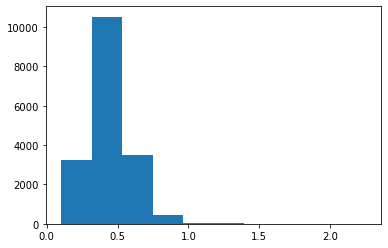

In [77]:
plt.hist(df_punks["tf-idf"])
plt.show()
# plt.hist(df_punks["mean_eth"])
# plt.show()

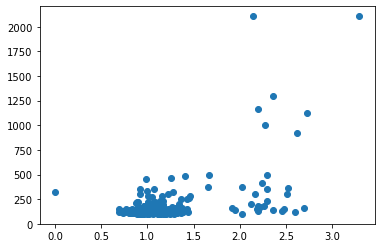

In [43]:
plt.scatter(df_sales_top5_combined["tf-idf_sum"], df_sales_top5_combined.mean_eth )

In [18]:
all_data = df_sales_tf_idf[['mean_eth','punk_id', 'tf-idf_sum']]
top50 = df_sales_top50[['mean_eth','punk_id', 'tf-idf_sum']]
top20 = df_sales_top20[['mean_eth','punk_id', 'tf-idf_sum']]
top10 = df_sales_top10[['mean_eth','punk_id', 'tf-idf_sum']]
top5 = df_sales_top5[['mean_eth','punk_id', 'tf-idf_sum']]
top1 = df_sales_top1[['mean_eth','punk_id', 'tf-idf_sum']]

bottom5 = df_sales_bottom5[['mean_eth','punk_id', 'tf-idf_sum']]

In [48]:
bottom5_combined = df_sales_bottom5_combined[['mean_eth','punk_id', 'tf-idf_sum', 'type_formatted', 'accessories_formatted']]
bottom5_combined.to_csv('bottom5_combined.csv', index=False)

In [49]:
top5_combined = df_sales_top5_combined[['mean_eth','punk_id', 'tf-idf_sum', 'type_formatted', 'accessories_formatted']]
top5_combined.to_csv('top5_combined.csv', index=False)

In [19]:
#all_data.to_csv('all_observable.csv', index=False)

In [20]:
#top50.to_csv('top50_observable.csv', index=False)

In [21]:
#top20.to_csv('top20_observable.csv', index=False)

In [22]:
#top10.to_csv('top10_observable.csv', index=False)

In [23]:
#top5.to_csv('top5_observable.csv', index=False)

In [24]:
#top1.to_csv('top1_observable.csv', index=False)

In [25]:
#bottom5.to_csv('bottom5_observable.csv', index=False)

In [26]:
# first we filtered on only those that were sold
# then we filtered on the top x%
# 80 percentile hits a mean_eth of 45.79 --> filter out anything less than 45
mean_sale.describe(percentiles=[0.05, 0.2,0.4,0.6,0.8, 0.9, 0.95, 0.99])

#df_sales_filtered.describe(percentiles=[0.2, 0.4, 0.6, 0.8])

,punk_id,mean_eth
count,6393.000000,6393.000000
mean,5334.129673,29.834085
std,2708.708702,61.512056
min,0.000000,0.000000
5%,1043.600000,0.140000
20%,2617.200000,1.000000
40%,4345.400000,10.869500
50%,5374.000000,17.225000
60%,6272.200000,23.545692
80%,8153.600000,45.790000


In [27]:
#new = df_punk_claimed.accessories_formatted.str.split(",", n = 7, expand = True)

In [47]:
#df_punks

In [29]:
df_counts

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,...,accessory_count,type_formatted,accessories_formatted,accessories_split,accessories_counts,type_counts,tf,idf,tf-idf,tf-idf_sum
0,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,3,Female,"Green Eye Shadow,Earring,Blonde Bob",Green Eye Shadow,271.0,6243,0.333333,1.567031,0.522344,1.336318
1,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,3,Female,"Green Eye Shadow,Earring,Blonde Bob",Earring,2459.0,6243,0.333333,0.609241,0.203080,1.336318
2,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,0,,,...,3,Female,"Green Eye Shadow,Earring,Blonde Bob",Blonde Bob,147.0,6243,0.333333,1.832683,0.610894,1.336318
3,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,2,,,...,1,Female,Wild Hair,Wild Hair,447.0,6243,1.000000,1.349692,1.349692,1.349692
4,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,5,,,...,3,Female,"Purple Eye Shadow,Half Shaved,Earring",Purple Eye Shadow,262.0,6243,0.333333,1.581699,0.527233,1.341208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27542,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,3,Alien,"Earring,Knitted Cap,Medical Mask",Knitted Cap,419.0,13,0.333333,1.377786,0.459262,1.247996
27543,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7523,,,...,3,Alien,"Earring,Knitted Cap,Medical Mask",Medical Mask,175.0,13,0.333333,1.756962,0.585654,1.247996
27544,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,3,Alien,"Cap Forward,Pipe,Small Shades",Cap Forward,254.0,13,0.333333,1.595166,0.531722,1.505538
27545,Claimed,,straybit…,2017-06-23,2017-06-23,larvalabs,,7804,,,...,3,Alien,"Cap Forward,Pipe,Small Shades",Pipe,317.0,13,0.333333,1.498941,0.499647,1.505538


In [74]:
df_counts[df_counts.type_formatted=='Male']

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,...,type_formatted,accessories_formatted,accessories_split,accessories_counts,type_counts,tf,idf_acc,idf_type,tf-idf,tf-idf_sum
10485,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,1,,,...,Male,"Smile,Mohawk",Smile,238.0,6039,0.333333,1.623423,0.219035,0.614153,1.139018
10486,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,1,,,...,Male,"Smile,Mohawk",Mohawk,441.0,6039,0.333333,1.355561,0.219035,0.524865,1.139018
10487,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,3,,,...,Male,"Wild Hair,Nerd Glasses,Pipe",Wild Hair,447.0,6039,0.250000,1.349692,0.219035,0.392182,1.187086
10488,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,3,,,...,Male,"Wild Hair,Nerd Glasses,Pipe",Nerd Glasses,572.0,6039,0.250000,1.242604,0.219035,0.365410,1.187086
10489,Claimed,,0xc352b5,2017-06-23,2017-06-23,larvalabs,,3,,,...,Male,"Wild Hair,Nerd Glasses,Pipe",Pipe,317.0,6039,0.250000,1.498941,0.219035,0.429494,1.187086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27283,Claimed,,0xba7ccc,2017-06-23,2017-06-23,larvalabs,,9993,,,...,Male,"Cap,Shadow Beard,Nerd Glasses",Nerd Glasses,572.0,6039,0.250000,1.242604,0.219035,0.365410,1.158354
27284,Claimed,,0xa9bfa9,2017-06-23,2017-06-23,larvalabs,,9996,,,...,Male,"Cigarette,Earring,Crazy Hair,Smile",Cigarette,961.0,6039,0.200000,1.017277,0.219035,0.247262,1.101816
27285,Claimed,,0xa9bfa9,2017-06-23,2017-06-23,larvalabs,,9996,,,...,Male,"Cigarette,Earring,Crazy Hair,Smile",Earring,2459.0,6039,0.200000,0.609241,0.219035,0.165655,1.101816
27286,Claimed,,0xa9bfa9,2017-06-23,2017-06-23,larvalabs,,9996,,,...,Male,"Cigarette,Earring,Crazy Hair,Smile",Crazy Hair,414.0,6039,0.200000,1.383000,0.219035,0.320407,1.101816


In [75]:
# df_counts contains necessary info for tableau for accessory and type counts
df_counts.to_csv('acc_type_counts.csv')

In [122]:
# save formatted data
df_punks.to_csv('cryptopunks_dashboard3.csv')

In [32]:
# save data
#with_avg_sale.to_csv('cryptopunks_dashboard.csv')

In [33]:
#acc_counts.to_csv('cryptopunks_acc_counts_dashboard.csv')